In [1]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [2]:
pwd

'C:\\Users\\SUHITA SREE KOLLI\\Pgc Python Project'

# Loading and Preprocessing

In [3]:
# Load the data using pandas library
# Importing ML case study file and header 0 as data starts from 0
df = pd.read_csv('C:/Users/SUHITA SREE KOLLI/Downloads/ML case Study.csv', header=0)

In [4]:
# shows first five rows of dataframe
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [5]:
# Load the data using pandas library
# importing college data and header 0 as data starts from 0
College = pd.read_csv('C:/Users/SUHITA SREE KOLLI/Downloads/Colleges.csv', header=0)

In [6]:
# To view first five rows of dataframe
College.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
# Load the data using pandas library
# importing cities data and header 0 as data starts from 0
cities = pd.read_csv('C:/Users/SUHITA SREE KOLLI/Downloads/cities.csv', header=0)

In [8]:
# To view first five rows of dataframe
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [9]:
# Convert college dataframe into 3 lists
Tier1 = College["Tier 1"].tolist()
Tier2 = College["Tier 2"].tolist()
Tier3 = College["Tier 3"].tolist()

In [10]:
# To view the list data of Tier1 for checking purpose
Tier1    # same we can view for Tier2 and Tier3

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [14]:
# Replace first loaded dataframe i.e.df , college column with list category i.e.Tier1,Tier2,Tier3

for item in df.College:    ### assigns category to the names of record
    if item in Tier1:
        df["College"].replace(item,1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3, inplace=True)

In [15]:
# To view the first five rows of dataframe for checking if college column is replace with correct list category or not
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [16]:
# Convert Cities dataframe into list
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [18]:
# Replace first loaded dataframe i.e.df , city column with list category i.e.Metro_city ,non_metro_city
for item in df.City:
    if item in metro_city:
        df["City"].replace(item,1,inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item,0,inplace=True)

In [19]:
# To view first five rows of dataframe
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


# 2. Data Preprocessing
# Missing Value Imputation

In [20]:
# Analye the explicit view of the dataframe in order to find any missing values in any attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


# Observation
we have not found any missing values in any data attributes so there is no need to do missing value imputation.

# Dummy variable creation to convert categorical variable into numerical

# In df.info() we can see only Role column is categorical-1589 non-null-object

In [21]:
# Get dummy variables for object datatype column name 'Role' in order to convert it into numerical value
df = pd.get_dummies(df, columns=['Role'], drop_first=True).astype(int)

In [22]:
# To view the first five rows of dataframe to check
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0


# Correlation
To check the correlation between independent and dependent to check tendency between them.

In [23]:
# Checking correrlation between two independent variables to remove unneccessary variable (if value > 0.8)

df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.257998,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005449,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301117,-0.026751
CTC,-0.029592,-0.020365,0.257998,0.011370,-0.005449,0.301117,1.000000,0.621310
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621310,1.000000


# Outliers Treatment

In [24]:
# Get Exploratory Data Description to find any missing values or outlier in the dataset
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


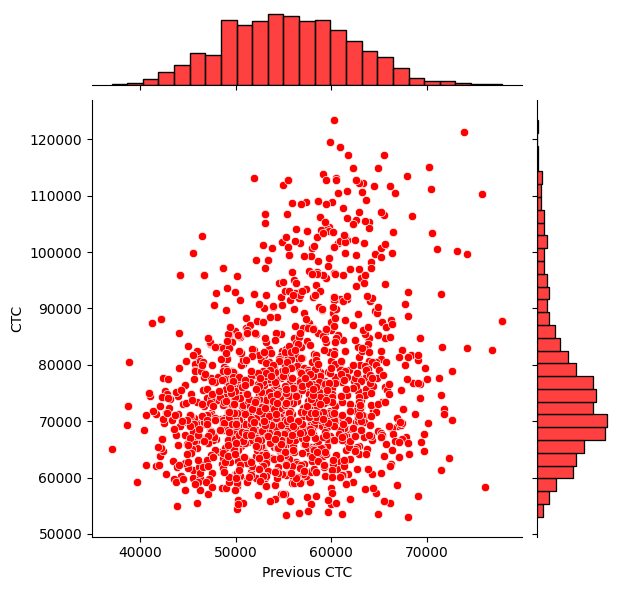

In [25]:
# Visualize the relationship between X-dependent variables against y-independent variable
sns.jointplot(x='Previous CTC',y='CTC',data=df,color='red')

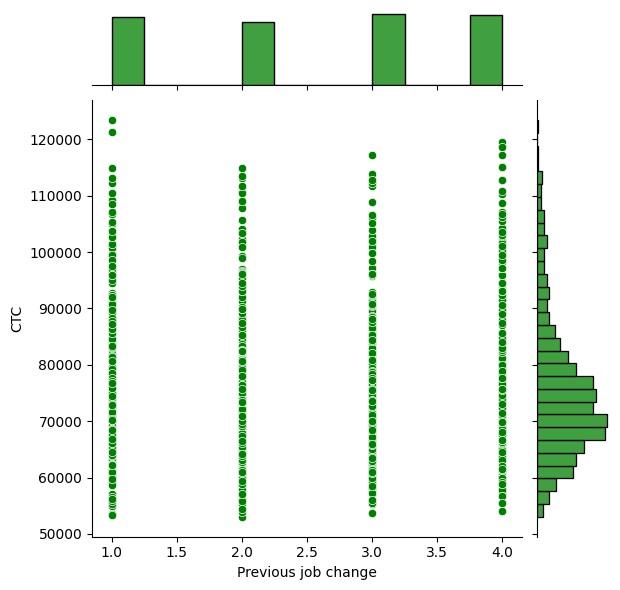

In [26]:
# Checking outlier using jointplot between independent ("Previous job change") and dependent variable that is "CTC".

sns.jointplot(x = "Previous job change", y = "CTC", data = df,color='green')

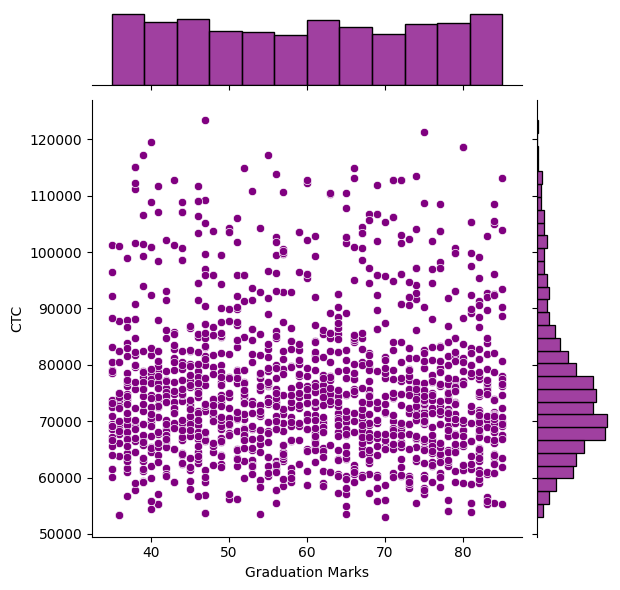

In [27]:
# Checking outlier using jointplot between independent ("Graduation Marks") and dependent variable that is "CTC".

sns.jointplot(x = "Graduation Marks", y = "CTC", data = df,color='purple')

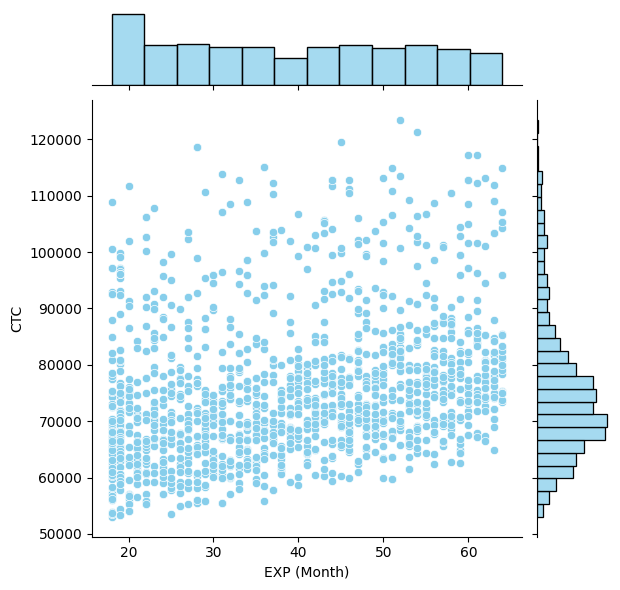

In [28]:
# Visualize the relationship between X-dependent variables against y-independent variable
sns.jointplot(x='EXP (Month)',y='CTC',data=df,color='skyblue')

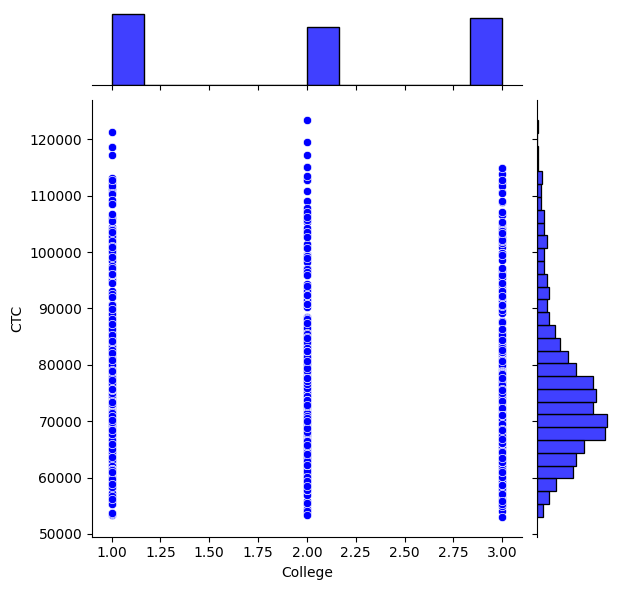

In [29]:
# Visualize the relationship between X-dependent variables against y-independent variable
sns.jointplot(x='College',y='CTC',data=df,color='blue')

# Observation :-
Did not found any outlier between dependent and independent variables. There is no data points that is far away from the exact data points

# 3. Data Spliting
Split the data into dependent and independent variables

In [30]:
#  Split the data into features (X) and target (y)
X = df.drop('CTC', axis=1) # (independent variables)
y = df['CTC']              # (dependent variables)

In [31]:
# Show the first first five rows of X feature
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523,3,66,19,1
1,2,0,57081,1,84,18,0
2,3,0,60347,2,52,28,0
3,3,0,49010,2,81,33,0
4,1,0,57879,4,74,32,0


In [32]:
# Show the first five rows of target feature y
y.head()

0    71406
1    68005
2    76764
3    82092
4    73878
Name: CTC, dtype: int64

# 4. Model Selection
Selecting regression models that are acceptable for predicting salary based on the input features. There are choices like, such as Linear Regression, Ridge regression, Lasso Regression, Decision Tree, KNN, Random forest Regression, Gradient boosting, and XG Boosting regression.

# Simple Linear Regression

In [33]:
# Import regression model library
import statsmodels.api as sn

In [34]:
# Creating constant variable for X
X_cons = sn.add_constant(X)

In [35]:
# Model fitting to X and y features
lm = sn.OLS(y,X_cons).fit()

In [36]:
# Getting the summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          4.71e-257
Time:                        13:08:04   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.663     17.522      0.000    3.41e+04    4.27e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                  380.8471    433.456      0.879      0.380    -469.362    1231.056
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Manager         1.949e+04    534.695     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Evaluation
R-squared value is 0.534, which means approximately 53.4% of the variance in the dependent variable(CTC) is explained by the independent variables in the model.

# Linear Regression

# Test-Train-Split
We are splitting the data into 80% of training data and 20% of test data

In [37]:
# Splitting data into train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [38]:
# Checking the size of the Test and Train Variable Of both x and y
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1271, 7) (1271,) (318, 7) (318,)


# Training Linear Regression Model

In [39]:
# Creating model object

lm2 = LinearRegression()

In [40]:
# Fitting our model over train data set

lm2.fit(X_train, Y_train)

LinearRegression()

In [41]:
# Model evaluation -Interpretation of result
print(lm2.intercept_, lm2.coef_)

39229.150954820434 [-5.17506078e+02  4.82819963e+02  4.22240508e-01  8.73566281e+00
  1.94069240e+00  2.43719557e+02  1.86020613e+04]


In [42]:
# Calcualting model accuracy for test and train data
print('r2 score of test set: ', r2_score(Y_test, lm2.predict(X_test)))
print('r2 score of train set: ', r2_score(Y_train, lm2.predict(X_train)))
print('MeanSquareError of test set', mean_squared_error(Y_test, lm2.predict(X_test)))
print('MeanSquareError of train set', mean_squared_error(Y_train, lm2.predict(X_train)))

r2 score of test set:  0.5933515097281489
r2 score of train set:  0.5137734046204612
MeanSquareError of test set 77362921.92796248
MeanSquareError of train set 73096551.52229236


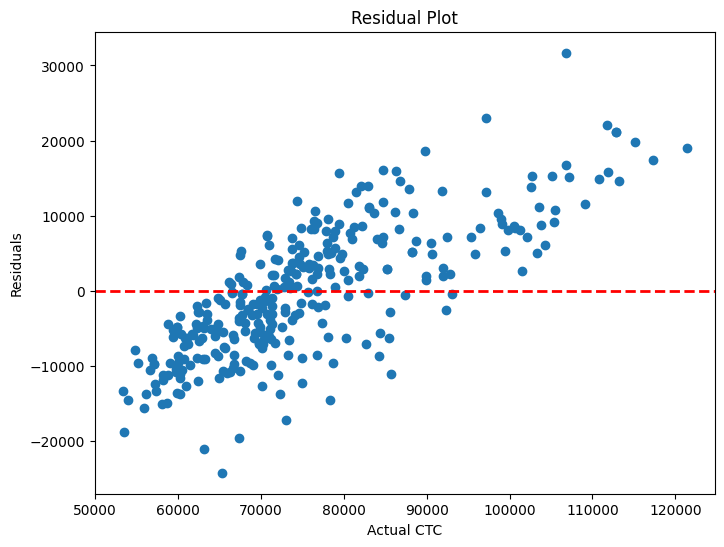

In [43]:
residuals = Y_test - lm2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Actual CTC')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals

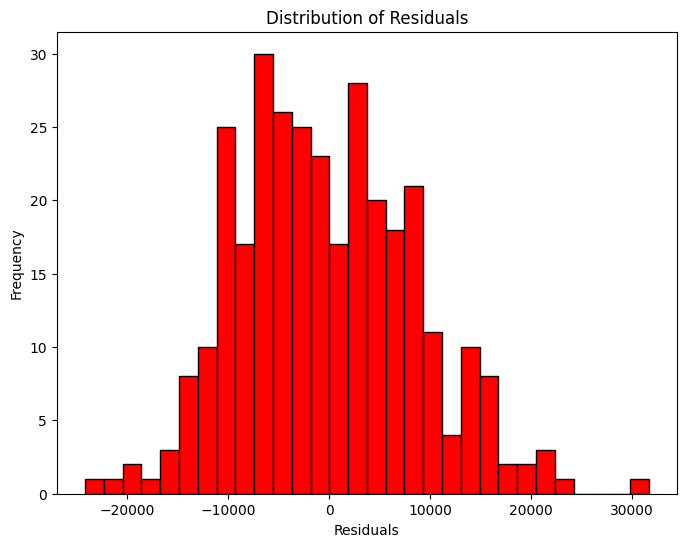

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k',color='r')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Scatter Plot of Predicted vs Actual Values

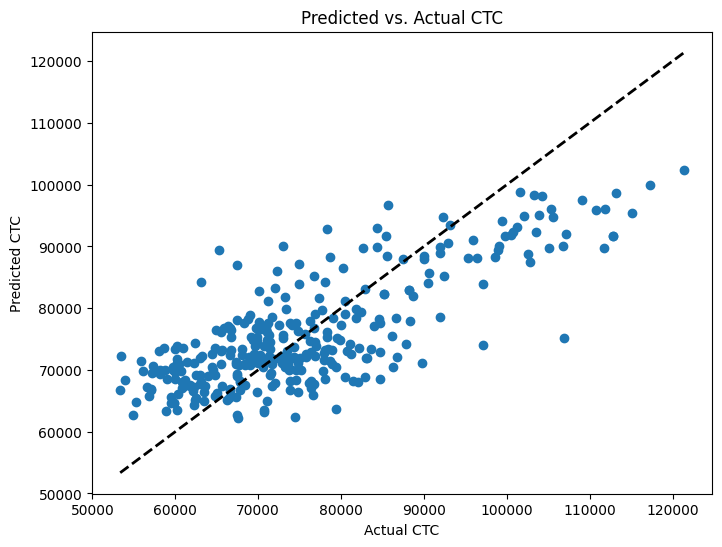

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lm2.predict(X_test))
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', lw=2)
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')
plt.show()

# Model Interpretation/Evaluation
Our model has a training MSE of 73096551.52229236, which suggests that it fits the training data reasonably well. The test MSE of 77362921.92796248 indicates how well model generalizes to new data. It's slightly higher than the training MSE, which is expected. A test R-squared score of 0.59 indicates that our linear regression model explains approximately 59% of the variance in the dependent variable (the variable we're trying to predict) for the test data.

# Ridge Regression

In [46]:
# Creating scaler object which will store the scaling information of our X train variable

scaler = preprocessing.StandardScaler().fit(X_train)

In [47]:
# Feature scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [48]:
# Model fitting to X and y features
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_s, Y_train)

Ridge()

In [49]:
# Calcualting model accuracy for test and train data

print('r2 score of test set: ', r2_score(Y_test, ridge_model.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, ridge_model.predict(X_train_s)))
print('MeanSquareError of test set: ', mean_squared_error(Y_test, ridge_model.predict(X_test_s)))
print('MeanSquareError of train set: ', mean_squared_error(Y_train, ridge_model.predict(X_train_s)))

r2 score of test set:  0.5932147354587052
r2 score of train set:  0.513773094888196
MeanSquareError of test set:  77388942.57572551
MeanSquareError of train set:  73096598.08568625


# Scatterplot of Predicted vs Actual Values

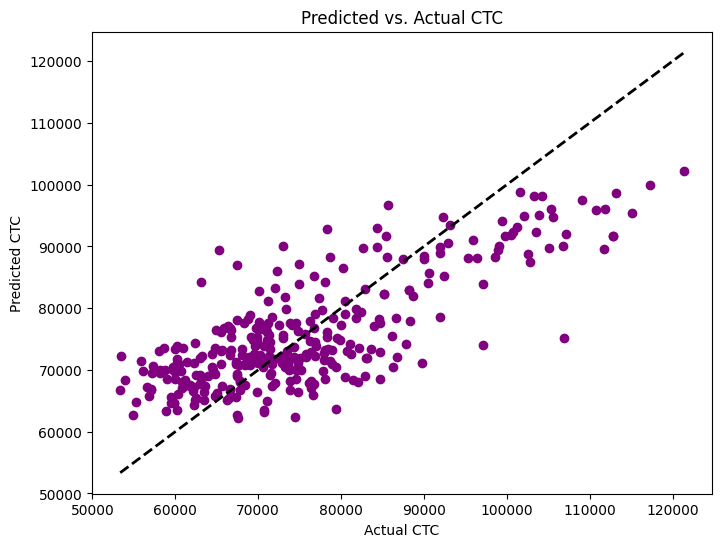

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, ridge_model.predict(X_test_s),color='purple')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'k--', lw=2)
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')
plt.show()

# Model Evaluation
The Test R-squared value is higher than the Train R-squared value.

Test R-squared of 0.5932 the model successfully accounts for a sizable percentage of the variation in the test data.

Train R-squared of 0.5137 indicates that the model has some capacity to explain the training set of data.

# Lasso Regression

In [51]:
# Importing Lasso from sklearn

from sklearn.linear_model import Lasso

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [55]:
# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

In [56]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_score_test = r2_score(y_test,y_pred)
r2_score_train = r2_score(y_train,lasso_model.predict(X_train_scaled))
print("Lasso Regression Mean Squared Error:", mse)
print("Lasso Regression r2_score_test:", r2_score_test)
print("Lasso Regression r2_score_train:", r2_score_train)

Lasso Regression Mean Squared Error: 77363584.08569583
Lasso Regression r2_score_test: 0.5933480291791227
Lasso Regression r2_score_train: 0.5137734041525495


# Model Evaluation
The R2 score on the test data is higher than the R2 score on the train data.

# Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Initialize the Decision Tree Regressor and fit the model
dt_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=10,random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=42)

In [60]:
# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

In [61]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 77065777.29092808
R-Squared: 0.5949134132218526


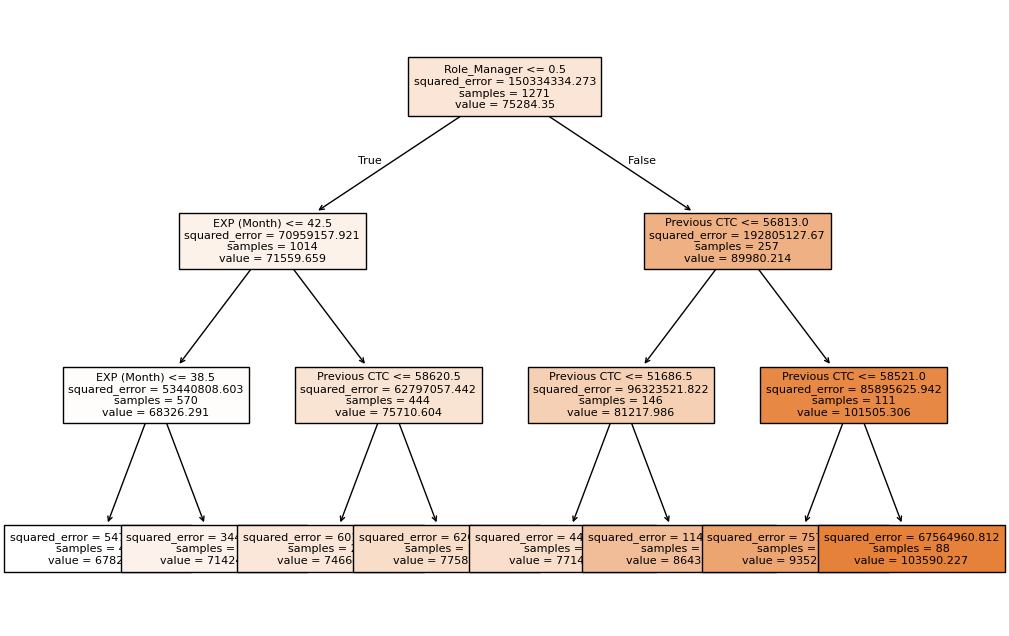

In [63]:
# Visualizing the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

# KNN (K- Nearest Neighbors) Regression

In [64]:
# Creating scaler object which will store the scaling information of our X train

scaler = preprocessing.StandardScaler().fit(X_train)

In [65]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)


# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [66]:
# Importing KNN regressor from sklearn

from sklearn.neighbors import KNeighborsRegressor

In [67]:
# Importing KNN regressor from sklearn

from sklearn.neighbors import KNeighborsRegressor

In [68]:
# Creating KNN regressor model Object

knn_reg = KNeighborsRegressor(n_neighbors = 3)


# Fitting our KNN model over train data set

knn_reg.fit(X_train_s, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [69]:
# Calcualting model accuracy for test and train data

print('Test set r2 score: ', r2_score(Y_test, knn_reg.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, knn_reg.predict(X_train_s)))
print('MSE of test set: ', mean_squared_error(Y_train, knn_reg.predict(X_train_s)))
print('MSE of train set :', mean_squared_error(Y_train, knn_reg.predict(X_train_s)))

Test set r2 score:  0.5314429446438234
Train set r2 score:  0.7195543486414575
MSE of test set:  42160610.29679167
MSE of train set : 42160610.29679167


# KNN - Using Grid Search

In [70]:
# Importing Grid Search model from Sklearn

from sklearn.model_selection import GridSearchCV

In [71]:
# Creating KNN model regressor object

knn_reg2 = KNeighborsRegressor(n_jobs = -1)

In [72]:
# Creating param grid for GridSearchCV function

param_grid = {'n_neighbors' : [1,2,3,5,6,7,8,9] } # Different values of K

In [73]:
# Creating Grid Search function by estimating KNN model.

grid_search = GridSearchCV(knn_reg2, param_grid, n_jobs = -1, cv = 5, scoring = 'r2')

In [74]:
# Training our model over Train data set

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 6, 7, 8, 9]},
             scoring='r2')

In [75]:
# Calculating & displaying best params

grid_search.best_params_

{'n_neighbors': 9}

In [76]:
# Calculating and storing best estimator model in a new object

grid_knn = grid_search.best_estimator_

In [77]:
# Calcualting model accuracy for test and train data

print('Test set r2 score: ', r2_score(Y_test, grid_knn.predict(X_test_s)))
print('Train set r2 score: ', r2_score(Y_train, grid_knn.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, grid_knn.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, grid_knn.predict(X_train_s)))

Test set r2 score:  0.6156920676721228
Train set r2 score:  0.6323698095326127
Mean_Squared_Error Of Test Set:  73112738.09255378
Mean_Squared_Error Of Train Set:  55267439.9426329


# Model Evaluation
The R² scores of approximately 0.632 (train) and 0.615 (test) suggest that model explains a substantial portion of the variance in both datasets. The test set MSE of 73112738.09255378 indicates that our model's predictions on the test data are reasonably accurate, but there may still be some room for improvement, depending on the specific context of problem.

# Random Forest

In [78]:
# Importing Random forest regreesor model

from sklearn.ensemble import RandomForestRegressor

In [79]:
# Creating scaler object which will store the scaling information of our X_train

scaler = preprocessing.StandardScaler().fit(X_train)

In [80]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)


# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [81]:
# Creating Random forest model object

rf_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state = 42)

In [82]:
# training our model over train data set

rf_reg.fit(X_train_s, Y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [83]:
# Calcualting model accuracy for test and train data

print('r2 score of test set: ', r2_score(Y_test, rf_reg.predict(X_test_s)))
print('r2 score of train set: ', r2_score(Y_train, rf_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, rf_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, rf_reg.predict(X_train_s)))

r2 score of test set:  0.6373508354912968
r2 score of train set:  0.9502314233891035
Mean_Squared_Error Of Test Set:  68992261.55339223
Mean_Squared_Error Of Train Set:  7481925.832522322


# Model Evaluation
The Test R-squared of 0.6373 indicates that the Random Forest model captures a significant percentage of the variation in the test data, implying high prediction performance on unknown data. The Train R-squared of 0.9502 shows that the model fits the training data exceptionally well, explaining a considerable portion of the variation.

# Random forest - Grid Search

In [84]:
# creating random forest model object

rf_reg2 = RandomForestRegressor(n_jobs = -1, random_state = 42)

In [85]:
# creating Dictionary of hyperparameters for random forest to use in grid search

param_test1 = {'n_estimators' : [250, 500, 750, 1000], # No. of sub trees we want
               'max_depth' : [None, 10,15,20],  # depth values of the tree
               'min_samples_split' : [2,4,6,8,10], # min observation required in subnodes after a split
               'min_samples_leaf' : [1,2,3]}  # min observation required in leaf node

In [86]:
# performing grid search with estimator : random forest and cross validation 5

grid_search2 = GridSearchCV(rf_reg2, param_test1, n_jobs = -1, cv = 5, scoring = 'r2')

In [87]:
# training model using train data set

grid_search2.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [250, 500, 750, 1000]},
             scoring='r2')

In [88]:
# calculating and displaying best params 

grid_search2.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [89]:
# accessing and storing best estimator model in an new object

rf_best_reg = grid_search2.best_estimator_

In [90]:
# Calcualting model accuracy for test and train data

print('r2 score of test set : ', r2_score(Y_test, rf_best_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, rf_best_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, rf_best_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, rf_best_reg.predict(X_train_s)))

r2 score of test set :  0.637110241604477
r2 score of train set 0.9499858607409755
Mean_Squared_Error Of Test Set:  69038033.3846609
Mean_Squared_Error Of Train Set:  7518842.329751014


# Gradient Boosting

In [91]:
# Importing library - gradient boost regressor

from sklearn.ensemble import GradientBoostingRegressor

In [92]:
# Creating scaler object which will store the scaling information of our X_train

scaler = preprocessing.StandardScaler().fit(X_train)

In [93]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)


# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [94]:
# Creating Gradient Boost regressor model object

gb_reg = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)

In [95]:
# Fitting Gradient Boost model over Train data set

gb_reg.fit(X_train_s, Y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [96]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, gb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, gb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, gb_reg.predict(X_train_s)))

r2 score of test set 0.6447829996032755
r2 score of train set 0.9461178107622011
Mean_Squared_Error Of Test Set:  67578328.03167564
Mean_Squared_Error Of Train Set:  8100343.048245395


# XG Boost Regressor

In [97]:
# Creating scaler object which will store the scaling information of our X train

scaler = preprocessing.StandardScaler().fit(X_train)

In [98]:
# Transforming our X_train to our X_train_scaler

X_train_s = scaler.transform(X_train)

In [99]:
# Transforming our X_test to our X_test_scaler

X_test_s = scaler.transform(X_test)

In [100]:
# Importing XG Boost

import xgboost as xgb

In [101]:
# Creating XG Boost regressor object

xgb_reg = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.02, random_state = 42)

In [102]:
# Fitting our XG Boost model over train data set

xgb_reg.fit(X_train_s, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [103]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, xgb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, xgb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, xgb_reg.predict(X_train_s)))

r2 score of test set 0.6289002895355225
r2 score of train set 0.9928675293922424
Mean_Squared_Error Of Test Set:  70599932.60401908
Mean_Squared_Error Of Train Set:  1072251.2105109983


# XG Boost regressor - Grid Search

In [ ]:
# Creating XG Boost regressor model object

xgb_reg2 = xgb.XGBRegressor(random_state = 42)

In [ ]:
# creating Dictionary of hyperparameters for XG Boost to use in grid search

param_test = {'n_estimators' : [500, 1000, 1500, 2000], # Number of sub trees we want
              'learning_rate': np.arange(0.01,0.1,0.01), # fixing learning rate value 0.01 to 0.1
              }

In [ ]:
# performing grid search with estimator : XG Boost and cross validation 5

grid_search3 = GridSearchCV(xgb_reg2, param_test, cv = 5, n_jobs = -1)

In [ ]:
# Fitting our XG Boost model over Train data set

grid_search3.fit(X_train_s, Y_train)

In [ ]:
# Calculating and displaying best params 

grid_search3.best_params_

In [ ]:
# Calculating and storing best estimator model in a new object

gs_xgb_reg = grid_search3.best_estimator_

In [ ]:
# Calcualting model accuracy for test and train data

print('r2 score of test set', r2_score(Y_test, gs_xgb_reg.predict(X_test_s)))
print('r2 score of train set', r2_score(Y_train, gs_xgb_reg.predict(X_train_s)))
print('Mean_Squared_Error Of Test Set: ', mean_squared_error(Y_test, gs_xgb_reg.predict(X_test_s)))
print('Mean_Squared_Error Of Train Set: ', mean_squared_error(Y_train, gs_xgb_reg.predict(X_train_s)))

# Model Prediction

In [ ]:
# Prepare New Employee Data (example data, replace with actual data)
new_data = pd.DataFrame({
    'College':[1,1],
    'City':[1,0],
    'Previous CTC': [25000,25000],
    'Previous job change': [1, 0],
    'Graduation Marks': [75, 80],
    'EXP (Month)': [2, 4],
    'Role_Manager':[0,1]
})

In [ ]:
# Standardizing our demo data set 

scaler = preprocessing.StandardScaler().fit(new_data)

# printing demo data
new_data

In [ ]:
# transfering scaled properties using scaler in demo_data_s object

new_data_s = scaler.transform(new_data)

In [ ]:
# Printing scaled variable values

new_data_s

# Prediciting salary using my best model - XG Boost

In [ ]:
# Predicting salary using XG Boost and storing it in a variable.

predicted_ctc = xgb_reg.predict(new_data_s)

In [ ]:
# Printing predicted salary

print('Predicted CTC Using XG Boost Model is : ', predicted_ctc)